In [1]:
# Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scr.utils import title_labels,gradienteDescendente,equacaoNormal,plot_3d

plt.rcParams["figure.figsize"] = (10,6)

In [2]:
# Importando os Dados Utilizados
caminhoData2 = r'data/raw/arquivos/data2.txt'
dadosImoveis = pd.read_csv(caminhoData2,names=['TamanhoCasa','NumeroQuartos','PrecoCasa'])
dadosImoveis.head()

,TamanhoCasa,NumeroQuartos,PrecoCasa
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
# Normalizando os Dados
dadosImoveis['TamanhoCasa'] = (dadosImoveis['TamanhoCasa']-dadosImoveis['TamanhoCasa'].mean())/dadosImoveis['TamanhoCasa'].std()
dadosImoveis['NumeroQuartos'] = (dadosImoveis['NumeroQuartos']-dadosImoveis['NumeroQuartos'].mean())/dadosImoveis['NumeroQuartos'].std()
dadosImoveis['PrecoCasa'] = (dadosImoveis['PrecoCasa']-dadosImoveis['PrecoCasa'].mean())/dadosImoveis['PrecoCasa'].std()

dadosImoveis.head()

,TamanhoCasa,NumeroQuartos,PrecoCasa
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


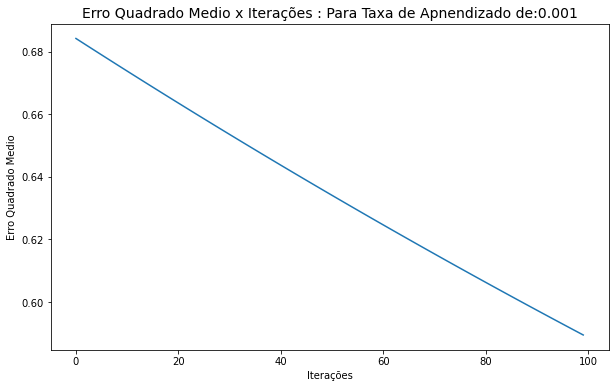

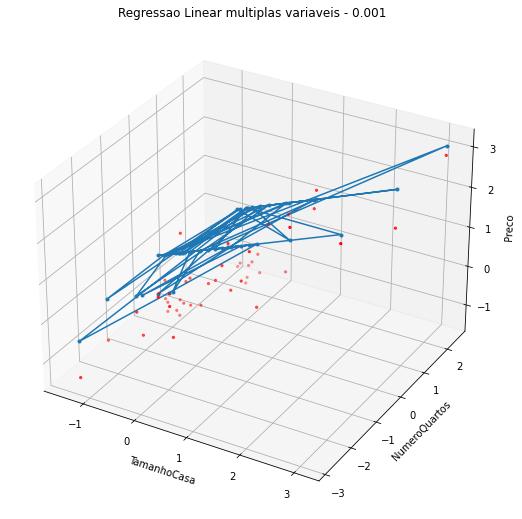

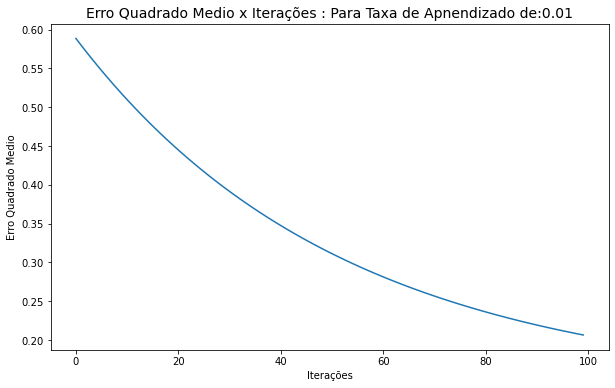

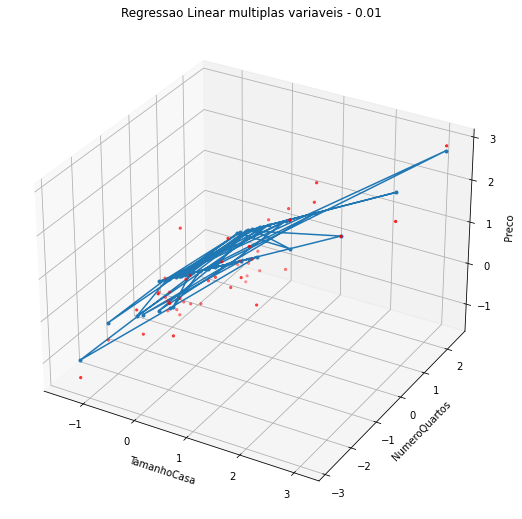

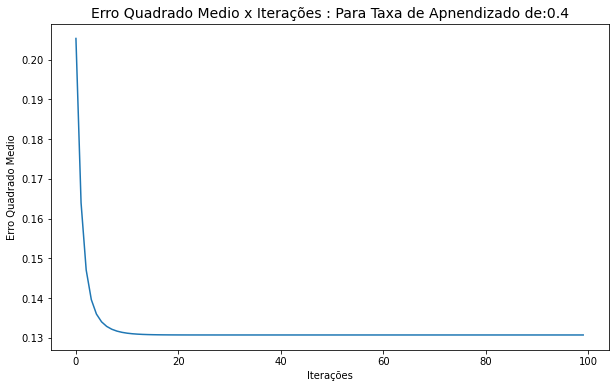

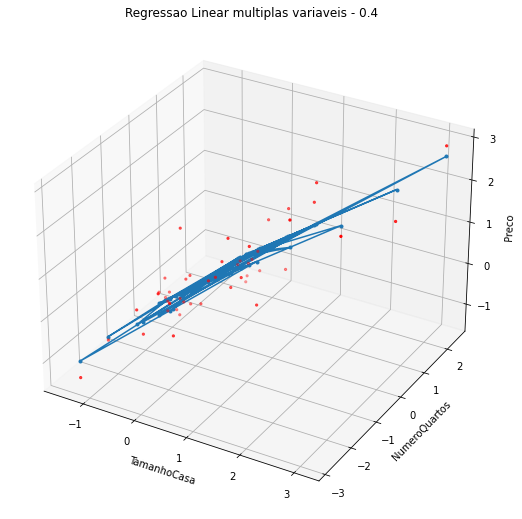

In [4]:
# Gerando as equações Linear e Plota os Gráficos
features = dadosImoveis.loc[:,:'NumeroQuartos']
target = dadosImoveis.drop(features,axis=1)
thetas = [1,0.5,0.25]

taxasAprendizado = [0.001, 0.01, 0.4]
for taxaAprendizado in taxasAprendizado: 
    thetas,erroQuadradoMedio = gradienteDescendente(features,target['PrecoCasa'],thetas,100,taxaAprendizado=taxaAprendizado)
    # Plot do Erro quadrado Médio
    plt.plot(list(range(0,len(erroQuadradoMedio))),erroQuadradoMedio)
    title_labels(f'Erro Quadrado Medio x Iterações : Para Taxa de Apnendizado de:{taxaAprendizado}',14,'Iterações','Erro Quadrado Medio')
    plt.show()
    plot_3d(features,target,thetas,taxaAprendizado)


### Equação Normal

In [5]:
# Importando os Dados Utilizados
caminhoData2 = r'data/raw/arquivos/data2.txt'
dadosImoveisSemNorm = pd.read_csv(caminhoData2,names=['TamanhoCasa','NumeroQuartos','PrecoCasa'])

# Separando os dados
featuresSemNorm = dadosImoveisSemNorm.loc[:,:'NumeroQuartos']
targetSemNorm = dadosImoveisSemNorm.drop(features,axis=1)

In [6]:
# Equação Normal para dados sem Normalizar
thetasSemNorm,erroSemNorm = equacaoNormal(featuresSemNorm,targetSemNorm)
print(f'Os thetas  gerados pela equação Normal sem Normalização foram{thetasSemNorm}')
print(f'O erro quadrado medio gerado pela equação Normal sem Normalização foi {erroSemNorm}')

Os thetas  gerados pela equação Normal sem Normalização foram[89597.90954279545, 139.21067401762562, -8738.019112327791]
O erro quadrado medio gerado pela equação Normal sem Normalização foi 2043280050.6028283


In [7]:
# Equação Normal para dados Normalizados
thetasNorm, erroNorm = equacaoNormal(features,target)
print(f'Os thetas  gerados pela equação Normal com Normalização foram{thetasNorm}')
print(f'O erro quadrado medio gerado pela equação Normal sem Normalização foi {erroNorm}')

Os thetas  gerados pela equação Normal com Normalização foram[-1.0755285551056204e-16, 0.8847659878549515, -0.053178819663278996]
O erro quadrado medio gerado pela equação Normal sem Normalização foi 0.13068648053904197


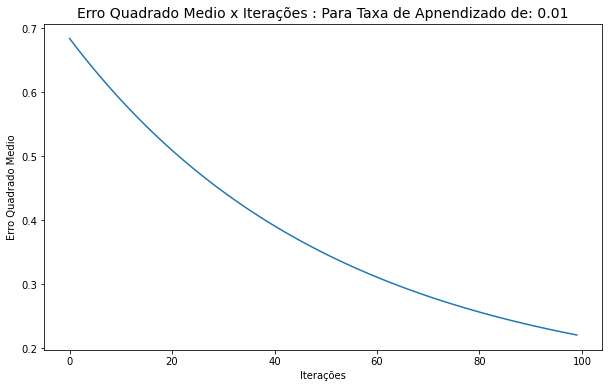

In [8]:
thetas = [1,0.5,0.25]
thetas,erroQuadradoMedio = gradienteDescendente(features,target['PrecoCasa'],thetas,100,taxaAprendizado=0.01)
plt.plot(list(range(0,len(erroQuadradoMedio))),erroQuadradoMedio)
title_labels(f'Erro Quadrado Medio x Iterações : Para Taxa de Apnendizado de: 0.01',14,'Iterações','Erro Quadrado Medio')
plt.show()

In [9]:
print(f'Os thetas  gerados pelo Gradiente Descendente com Normalização foi {thetas}')
print(f'O erro quadrado medio gerado pelo Gradiente Descendente com Normalização foi {erroQuadradoMedio[-1]}')

Os thetas  gerados pelo Gradiente Descendente com Normalização foi [0.3660323412732296, 0.6526085880637106, 0.16146248210545427]
O erro quadrado medio gerado pelo Gradiente Descendente com Normalização foi 0.22083717114303167


Podemos visualizar que o metodo de equação normal com normalização foi mais eficiente 
que o do gradienteDescendente quando olhamos em relação ao erro quadrado medio onde obtivemos 0.13 para o primeiro versus 0.22 para o segundo.
Isso pode ocorrer pelo numero de iterações que escolhemos no gradiente descendente ou a escolha da taxa de aprendizado.
Vale ressaltar também que a equaçãonormal é uma boa opção para uma quantidade pequena de dados, mas quando tivermos uma maior volumetria de dados é melhor utilizar o metodo do gradienteDescendente.